In [12]:
using Geant4
using Geant4.SystemOfUnits
#using GLMakie, Rotations, IGLWrap_jll  # to force loding G4Vis extension
using CairoMakie
using GeometryBasics, Rotations, IGLWrap_jll

In [2]:
#include(joinpath(@__DIR__, "../../../examples/basic/B1/DetectorB1.jl"))


constructB1Detector (generic function with 1 method)

In [2]:
mutable struct B1Detector <: G4JLDetector
    # main input parameters
    const checkOverlaps::Bool       # do check overlaps when creating the geometry
end

In [3]:
function B1Construct(det::B1Detector)::CxxPtr{G4VPhysicalVolume}

    nist = G4NistManager!Instance()
    checkOverlaps = det.checkOverlaps
    # Envelope parameters
    env_sizeXY = 20cm
    env_sizeZ  = 30cm
    env_mat    = FindOrBuildMaterial(nist, "G4_WATER")
  
    # Option to switch on/off checking of volumes overlaps
    #checkOverlaps = true
  
    # World
    world_sizeXY = 1.2*env_sizeXY
    world_sizeZ  = 1.2*env_sizeZ
    world_mat = FindOrBuildMaterial(nist, "G4_AIR")
  
    solidworld = G4Box("World", 0.5 * world_sizeXY, 0.5 * world_sizeXY, 0.5 * world_sizeZ)
    logicworld = G4LogicalVolume(move!(solidworld), world_mat, "World")
  
    physWorld = G4PVPlacement(nothing,          # no rotation
                              G4ThreeVector(),  # at (0,0,0)
                              logicworld,       # its logical volume
                              "World",          # its name
                              nothing,          # its mother volume
                              false,            # no boolean operation
                              0,                # copy number
                              checkOverlaps)    # overlaps checking
  
    # Envelope
    solidEnv = G4Box("Envelope", 0.5 * env_sizeXY, 0.5 * env_sizeXY, 0.5 * env_sizeZ)
    logicEnv = G4LogicalVolume(move!(solidEnv), env_mat, "Envelope")
  
    G4PVPlacement(nothing,           # no rotation
                  G4ThreeVector(),   # at (0,0,0)
                  logicEnv,          # its logical volume
                  "Envelope",        # its name
                  logicworld,        # its mother  volume
                  false,             # no boolean operation
                  0,                 # copy number
                  checkOverlaps)     # overlaps checking
    # shape 1
    shape1_mat = FindOrBuildMaterial(nist, "G4_A-150_TISSUE")
    pos1 = G4ThreeVector(0, 2cm, -7cm)
    
    # Conical section shape
    shape1_rmina =  0cm; shape1_rmaxa = 2cm
    shape1_rminb =  0cm; shape1_rmaxb = 4cm
    shape1_hz = 3cm
    shape1_phimin = 0deg; shape1_phimax = 360deg
  
    solidShape1 = G4Cons("Shape1", shape1_rmina, shape1_rmaxa, shape1_rminb, shape1_rmaxb,
                  shape1_hz, shape1_phimin, shape1_phimax)
    
    logicShape1 = G4LogicalVolume(move!(solidShape1), shape1_mat, "Shape1")
    G4PVPlacement(nothing,      # no rotation
                  pos1,         # at position
                  logicShape1,  # its logical volume
                  "Shape1",     # its name
                  logicEnv,     # its mother  volume
                  false,        # no boolean operation
                  0,            # copy number
                  checkOverlaps)# overlaps checking
    # Shape 2
    shape2_mat = FindOrBuildMaterial(nist, "G4_BONE_COMPACT_ICRU")
    pos2 = G4ThreeVector(0, -1cm, 7cm)
                  
    # Trapezoid shape
    shape2_dxa = 12cm; shape2_dxb = 12cm
    shape2_dya = 10cm; shape2_dyb = 16cm
    shape2_dz  = 6cm
    solidShape2 = G4Trd("Shape2", 0.5 * shape2_dxa, 0.5 * shape2_dxb, 0.5 * shape2_dya, 0.5 * shape2_dyb, 0.5 * shape2_dz)
    logicShape2 = G4LogicalVolume(move!(solidShape2), shape2_mat, "Shape2")
    G4PVPlacement(nothing,        # no rotation
                  pos2,           # at position
                  logicShape2,    # its logical volume
                  "Shape2",       # its name
                  logicEnv,       # its mother  volume
                  false,          # no boolean operation
                  0,              # copy number
                  checkOverlaps)  # overlaps checking

    # Visualization attributes              
    SetVisAttributes(logicworld, G4VisAttributes!GetInvisible())
    SetVisAttributes(logicEnv, G4VisAttributes!GetInvisible())
    SetVisAttributes(logicShape1, G4VisAttributes(G4Colour(1.0, 1.0, 0.0)))
    SetVisAttributes(logicShape2, G4VisAttributes(G4Colour(0.0, 0.0, 1.0)))
                  
    return physWorld              # return a pointer to the G4PhysicalVolume
end
  

B1Construct (generic function with 1 method)

In [4]:
Geant4.getConstructor(::B1Detector)::Function = B1Construct

In [5]:
particlegun = G4JLGunGenerator(particle = "e-", 
                               energy = 100MeV, 
                               direction = G4ThreeVector(0,0,1), 
                               position = G4ThreeVector(0,0,-16cm))

G4JLGunGenerator("ParticleGun", Geant4.G4JLParticleGunData(nothing, "e-", G4ThreeVector(0.0,0.0,1.0), G4ThreeVector(0.0,0.0,-160.0), 100.0), Geant4.var"#init#23"(), Geant4.var"#gen#24"(), G4JLGeneratorAction[])

In [6]:
app = G4JLApplication( detector = B1Detector(true),          # detector with parameters
                       generator = particlegun,                      # primary particle generator
                       nthreads = 1,                                 # number of threads (MT)
                       physics_type = QBBC,                     # what physics list to instantiate
                      );


**************************************************************
 Geant4 version Name: geant4-11-01-patch-01 [MT]   (10-February-2023)
  << in Multi-threaded mode >> 
                       Copyright : Geant4 Collaboration
                      References : NIM A 506 (2003), 250-303
                                 : IEEE-TNS 53 (2006), 270-278
                                 : NIM A 835 (2016), 186-225
                             WWW : http://geant4.org/
**************************************************************



In [7]:
configure(app)

In [8]:
initialize(app)

Checking overlaps for volume Envelope:0 (G4Box) ... OK! 
Checking overlaps for volume Shape1:0 (G4Cons) ... OK! 
Checking overlaps for volume Shape2:0 (G4Trd) ... OK! 


In [9]:
beamOn(app, 1)

In [10]:
world = GetWorldVolume()

Geant4.G4VPhysicalVolumeDereferenced(Ptr{Nothing} @0x0000600002c25e00)

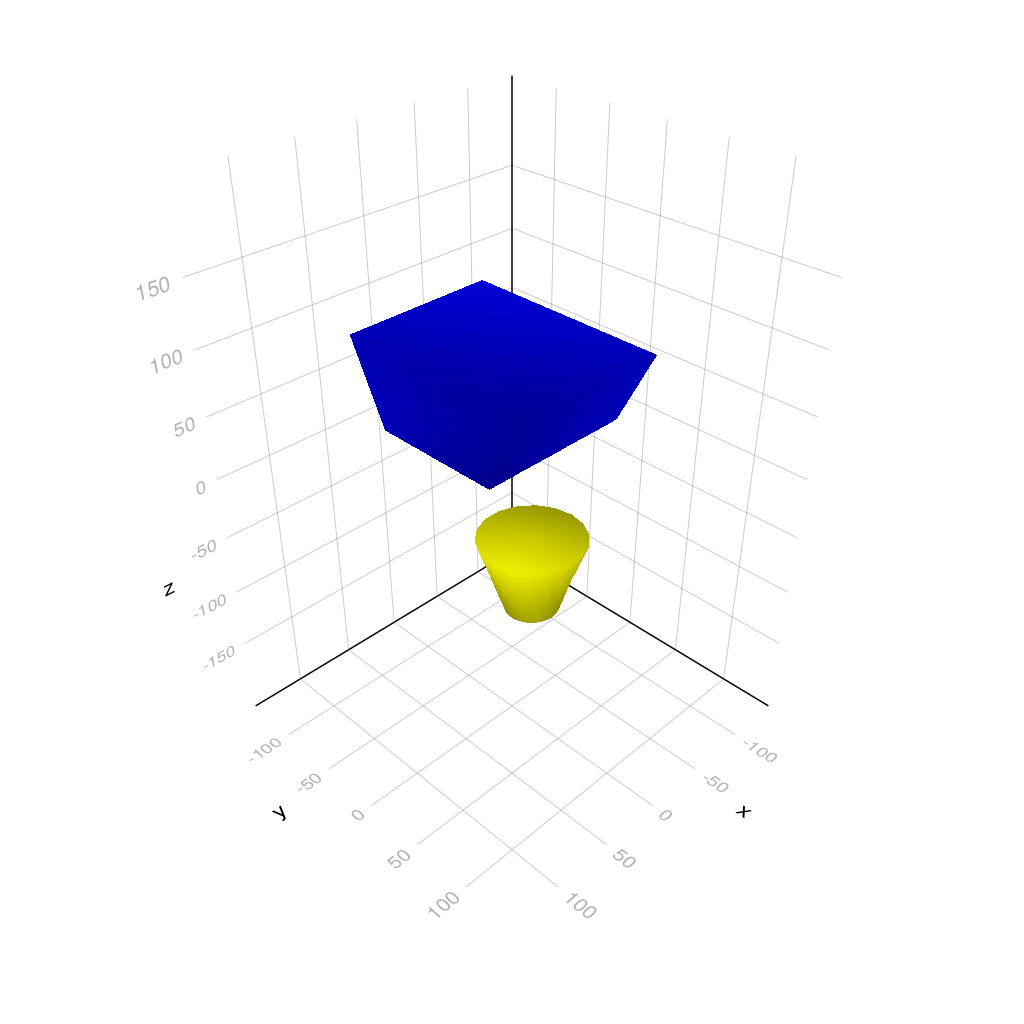

CairoMakie.Screen{IMAGE}


In [13]:
fig = Figure(resolution=(1024,1024))
s = LScene(fig[1,1])
Geant4.draw!(s, world)
#for t in tracks
#    lines!(t)
#end
display(fig)